In [1]:
import matplotlib as mpl
# mpl.use("Agg")
import matplotlib.pyplot as pp

import numpy as np
from scipy.linalg import eigh
from scipy.sparse import coo_matrix
from sklearn.cluster import KMeans
import seaborn as sns

sns.set()

In [42]:
def plot_cluster(ebds, epsilon=0.05):
    # Rotate embeddings such that node 4 is always embedded straight down
    four = ebds[12]
    alpha = np.arccos(-four[1] / np.linalg.norm(four))
    c, s = np.cos(alpha), np.sin(alpha)
    R = np.array([[c, -s], [s, c]])
    ebds = ebds @ R

    clusters = KMeans(n_clusters=3).fit_predict(ebds)

    fig, ax = pp.subplots(1, 1, figsize=(6, 6))
    xptp, yptp = ebds.ptp(axis=0) * 0.1
    ax.set_xlim((ebds[:, 0].min() - xptp, ebds[:, 0].max() + xptp))
    ax.set_ylim((ebds[:, 1].min() - yptp, ebds[:, 1].max() + yptp))

    # Disturb points to show nodes that get mapped to the same coordinates
    points = ebds + np.random.rand(*ebds.shape) * epsilon

    colors = ["firebrick", "seagreen", "dodgerblue"]
    bbox_props = dict(boxstyle="circle", alpha=0.5, ec="b", lw=2)
    for i, xyc in enumerate(zip(points, clusters)):
        xy, c = xyc
        bbox_props["fc"] = colors[c]
        pp.text(xy[0], xy[1], str(i + 1), bbox=bbox_props,
                horizontalalignment="center", verticalalignment="center")

    return fig, ax

def laplacian(A):
    D = A.sum(axis=0)
    return np.identity(A.shape[0]) * D - A

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


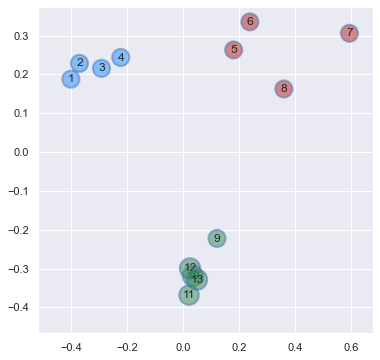

In [43]:
edges = np.array([
    (1, 2, 1), (1, 3, 1), (2, 3, 3), (3, 4, 4), (4, 5, 1),
    (5, 6, 2), (5, 8, 1), (7, 8, 1), (8, 9, 1), (9, 10, 1), (9, 12, 2), (10, 11, 1), (10, 12, 1), (11, 12, 1), (12, 13, 3)]).T
edges[:2] -= 1
A = coo_matrix((edges[2], (edges[0], edges[1])), shape=(13, 13)).toarray()
A = A + A.T

_, eig = eigh(laplacian(A), eigvals=(1, 2))
fig, _ = plot_cluster(eig)
fig.savefig("problem_3_pre.png")
fig.show()
